## Содержание

### Введение. Определение перспективного тарифа для телеком-компании
#### Описание тарифов
#### Примечание

### Изучение данных из файлов

### Предобработка и подготовка данных

### Анализ данных
#### Построение гистраграммы

### Проверка гипотез

### Вывод

# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

## Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Изучение данных из файлов

В нашем проекте будем пользоваться библиотекой Pandas, Matplotlib для гистаграмм, Numpy для математических функций, методами из пакета scipy.stats.

In [1]:
# Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Сохраняем датасеты в переменные 
df_calls = pd.read_csv('D:/Project/4/calls.csv', sep = ',')
df_internet = pd.read_csv('D:/Project/4/internet.csv', sep = ',')
df_messages = pd.read_csv('D:/Project/4/messages.csv', sep = ',')
df_tariffs = pd.read_csv('D:/Project/4/tariffs.csv', sep = ',')
df_users = pd.read_csv('D:/Project/4/users.csv', sep = ',')

##### Изучим общую информацию в данных файла `calls`:

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Файл `calls` ("Информация о звонках") содержит 4 колонки. Тип файлов "вещественные числа", "целые числа", "строка". Всего 202607 строк, пропущенных значений нет. Изучим первые 10 строк:

In [4]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Согласно документации к данным, колонки имеют значение:

- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

#####  Изучим общую информацию в данных файла `internet`:

In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Файл `internet` ("Информация об интернет-сессиях") содержит 5 колонок. Тип файлов "вещественные числа", "целые числа", "строка". Всего 149396 строк, пропущенных значений нет. Изучим первые 10 строк:

In [6]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Согласно документации к данным, колонки имеют значение:

- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

#####  Изучим общую информацию в данных файла `messages`:

In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Файл `messages` ("Информация о сообщениях") содержит 3 колонки. Тип файлов "целые числа", "строка". Всего 123036 строк, пропущенных значений нет. Изучим первые 10 строк:


In [8]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Согласно документации к данным, колонки имеют значение:

- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

##### Изучим общую информацию в данных файла `tariffs`:

In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Файл `tariffs` ("Информация о тарифах") содержит 8 колонок. Тип файлов "целые числа", "строка". Всего 2 строки, пропущенных значений нет. Изучим строки:


In [10]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Согласно документации к данным, колонки имеют значение:

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

##### Изучим общую информацию в данных файла `users`:

In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Файл `users` ("Информация о пользователях") содержит 8 колонок. Тип файлов "целые числа", "строка". Всего 500 строк, имеются пропущенные значения. Изучим первые 10 строк:

In [12]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Согласно документации к данным, колонки имеют значение:

- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tarif` — название тарифного плана

### Выводы:
- в файле `calls` в столбце `duration` время обозначено в минутах и секундах. Согласно условию, компания всегда округляет секунды в минуты, причем в большую сторону. Необходимо сделать предобработку данных. Кроме того, в столбец `call_date` необходимо обработать методом `datetime`, чтобы Pandas не принял их за строки или числа. Также проверим столбец `id` на дубликаты;
- в файле `internet` в столбец `Unnamed: 0` явно лишний, т.к. дублирует индексацию. Удалим его. Согласно условию, компания всегда округляет мегабайты в гигабайты, причем в большую сторону. Необходимо сделать предобработку данных. Кроме того, столбец `session_date` необходимо обработать методом `datetime`, чтобы Pandas не принял их за строки или числа. Также проверим столбец `id` на дубликаты;
- в файле `messages` столбец `message_date` необходимо обработать методом `datetime`, чтобы Pandas не принял их за строки или числа. Также проверим столбец `id` на дубликаты;
- в файле `tariffs` на первый взгляд данные представлены в надлежащем виде;
- в файле `users` в столбце `churn_date` видим пропущенные значения, однако, согласно документации, если значение пропущено, значит, тариф действовал на момент выгрузки. Следовательно, заполнять пропущенные значения не нужно. Столбцы `churn_date` и `reg_date` необходимо обработать методом `datetime`

# Предобработка и подготовка данных

### `calls` ("Информация о звонках")

In [13]:
# Переведем секунды в минуты в столбце `duration` в большую сторону и меняем тип на целочисленный
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [14]:
# Обработаем столбец `call_date`:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [15]:
# Проверим столбец `id` на дубликаты
df_calls['id'].duplicated().sum()

0

In [16]:
# Проверим файл после предобработки
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


In [17]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


Обработка файла `calls` произведена успешно

### `internet` ("Информация об интернет-сессиях")

In [18]:
# меняем тип на целочисленный
#df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')

In [19]:
# Обработаем столбец `session_date`:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [20]:
# Проверим столбец `id` на дубликаты
df_internet['id'].duplicated().sum()

0

In [21]:
# Удалим столбец `Unnamed: 0` методом `drop`
df_internet = df_internet.drop('Unnamed: 0', axis=1)

In [22]:
# Проверим файл после предобработки
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [23]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Обработка файла `internet` произведена успешно

### `messages` ("Информация о сообщениях")

In [24]:
# Обработаем столбец `message_date`:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [25]:
# Проверим столбец `id` на дубликаты
df_messages['id'].duplicated().sum()

0

In [26]:
# Проверим файл после предобработки
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [27]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Обработка файла `messages` произведена успешно


### `tariffs` ("Информация о тарифах")

In [28]:
# Еще раз посмотрим на файл
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [29]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Файл `tariffs` в обработке не нуждается 

### `users` ("Информация о пользователях")

In [30]:
# Обработаем столбец `churn_date`:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [31]:
# Обработаем столбец `reg_date`:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [32]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


In [33]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [34]:
# Посмотрим уникальные значения столбца "Дата прекращения пользования тарифом"
df_users['churn_date'].value_counts()

2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-09    2
2018-12-21    2
2018-12-30    1
2018-10-28    1
2018-11-26    1
2018-11-27    1
2018-11-16    1
2018-10-27    1
2018-10-05    1
2018-09-27    1
2018-11-13    1
2018-12-25    1
2018-12-14    1
2018-12-24    1
2018-09-26    1
2018-11-22    1
2018-08-17    1
2018-10-04    1
2018-09-02    1
2018-12-18    1
2018-11-30    1
2018-12-20    1
2018-12-16    1
2018-11-07    1
2018-12-23    1
2018-08-31    1
2018-12-26    1
2018-12-11    1
2018-11-21    1
2018-10-25    1
Name: churn_date, dtype: int64

Обработка файла `users` произведена успешно, типы данных преобразованы, пропущенные значения в замене и удалении не нуждаются. Сведения о тарифах предоставлены по состоянию на 2018 год

#### Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Количество сделанных звонков и израсходованных минут разговора по месяцам:

In [35]:
# Необходимо в файле `df_calls` создать дополнительный столбец 'month' и найти номер месяца методом `dt.month()`
df_calls['month'] = df_calls['call_date'].dt.month

In [36]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Количество отправленных сообщений по месяцам:

In [37]:
# Необходимо в файле `df_messages` создать дополнительный столбец 'month' и найти номер месяца методом `dt.month()`
df_messages['month'] = df_messages['message_date'].dt.month

In [38]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Объем израсходованного интернет-трафика по месяцам:

In [39]:
# Необходимо в файле `df_internet` создать дополнительный столбец 'month' и найти номер месяца методом `dt.month()`
df_internet['month'] = df_internet['session_date'].dt.month

In [40]:
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,"1,052.81",2018-09-07,1000,9
2,1000_2,"1,197.26",2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Согласно задания, необходимо посчитать какое количество конкретный пользователь сделал звонков и израсходовал минут. Воспользуемся методом группировки `groupby`, а  методом `agg` укажем, какие функции необходимо применить к столбцу 'duration' (длительность звонка) - `count` (количество) и `sum` (сумма)

In [41]:
# reset_index применяем для того, чтобы user_id стал колонкой
df_groupby_calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()

In [42]:
# осуществим замену имен колонок для удобства
df_groupby_calls.columns = ['user_id', 'month', 'total_calls', 'time_calls']

In [43]:
df_groupby_calls

,user_id,month,total_calls,time_calls
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Осуществим группировку отправленных сообщений:

In [44]:
# Сгруппируем по уникальному номеру сообщения
df_groupby_messages = df_messages.groupby(['user_id', 'month'])['id'].agg('count').reset_index()

In [45]:
df_groupby_messages.columns = ['user_id', 'month', 'total_message']

In [46]:
df_groupby_messages

,user_id,month,total_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Осуществим группировку объема израсходованного интернет-трафика по месяцам:

In [47]:
# Сгруппируем по уникальному объёму потраченного за сессию интернет-трафика
df_groupby_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].agg('sum').reset_index()

In [48]:
# осуществим замену имен колонок для удобства
df_groupby_internet.columns = ['user_id', 'month', 'total_traffic']

In [49]:
df_groupby_internet

,user_id,month,total_traffic
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"
...,...,...,...
3198,1498,10,"20,579.36"
3199,1499,9,"1,845.75"
3200,1499,10,"17,788.51"
3201,1499,11,"17,963.31"


Соединим таблицы с общей таблицей "Информация о пользователях"

In [50]:
df_groupby = df_groupby_calls.merge(df_groupby_messages, on=['user_id', 'month'], how='outer'
                                   ).merge(df_groupby_internet, on=['user_id', 'month'], how='outer'
                                          ).merge(df_users, on=['user_id'], how='outer')

In [51]:
df_groupby

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.00,22.00,159.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.00,43.00,172.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.00,47.00,340.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.00,52.00,408.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.00,58.00,466.00,57.00,"14,568.91",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,21.00,"19,559.44",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.00,NaN,NaN,20.00,"17,491.56",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.00,NaN,NaN,35.00,"17,322.51",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Получили таблицу. Проверим ее на пропущенные значения:

In [52]:
df_groupby.isna().sum()

user_id             0
month               2
total_calls        42
time_calls         42
total_message     499
total_traffic      13
age                 0
churn_date       3027
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
dtype: int64

Видим, что есть пропущенные значения, но это вполне объяснимо: кто-то только звонит и не пользуется сообщениями и интернетом. А кто-то, наоборот, пользуется только интернетом и не пользуется звонками. Бросается в глаза пропущенные значения в графе месяц. Внимательно рассмотрим эти строки:

In [53]:
df_groupby.iloc[3214:3216]

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Видим, что Ксения и Ириней зарегистрировались в конце декабря, ничем не пользовались и в течение недели прекратили пользоваться тарифом. В нашей работе мы можем удалить эти строки

In [54]:
df_groupby = df_groupby.drop(labels=[3214, 3215], axis=0)

Теперь заполним пропущенные значения 0 (за исключением столбца "Дата прекращения пользования тарифом", т.к. если значение пропущено, то значит, тарифом еще пользуются

In [55]:
df_groupby['total_calls'] = df_groupby['total_calls'].fillna(0)

In [56]:
df_groupby['time_calls'] = df_groupby['time_calls'].fillna(0)

In [57]:
df_groupby['total_message'] = df_groupby['total_message'].fillna(0)

In [58]:
df_groupby['total_traffic'] = df_groupby['total_traffic'].fillna(0)

In [59]:
df_groupby.isna().sum()

user_id             0
month               0
total_calls         0
time_calls          0
total_message       0
total_traffic       0
age                 0
churn_date       3027
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
dtype: int64

In [60]:
df_groupby

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.00,22.00,159.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.00,43.00,172.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.00,47.00,340.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.00,52.00,408.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.00,58.00,466.00,57.00,"14,568.91",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.00,0.00,0.00,17.00,"11,050.56",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9.00,0.00,0.00,32.00,"17,206.30",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10.00,0.00,0.00,21.00,"19,559.44",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.00,0.00,0.00,20.00,"17,491.56",35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Поменяем тип данных в столбцах на целочисленный:

In [61]:
import warnings
warnings.filterwarnings("ignore") 
# Как и ранее, для замены типа данных воспользуемся методом `astype()`
df_groupby = df_groupby.astype({'month': np.int, 'total_calls': np.int, 'time_calls': np.int, 
                               'total_message': np.int, 'total_traffic': np.int})

In [62]:
df_groupby

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,159,22,2253,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172,60,23233,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340,75,14003,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408,81,14055,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466,57,14568,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11050,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,0,0,32,17206,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,0,0,21,19559,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,0,0,20,17491,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Вспомним цифры тарифа, рассчитаем выручку с каждого абонента за месяц и добавим столбец в нашу таблицу

In [63]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [64]:
# Напишем функцию, в которой количество использованных минут/сообщений/мегабайт с тарифом сравним с тарифом
# (с помощью индексации по координатам). Если использованных минут/сообщений/мегабайт получилось больше, то 
# умножаем на сумму сверх лимита. Если меньше, то приравниваем 0. В конце тарифа считаем доход: 
# свехлимитные звонки/сообщения/мегабайт (в рублях) складываем с абонентской платой.
# Слеудет обратить внимание, что интернет переводим в гигабайты, округляем до целого числа и умножаем на стоимость 1 Гб
def profit(row):
    if row['tariff'] == 'smart':
        
        if row['time_calls'] > df_tariffs.loc[0, 'minutes_included']:
            calls = (row['time_calls'] - df_tariffs.loc[0, 'minutes_included'])*df_tariffs.loc[0, 'rub_per_minute']
        else:
            calls = 0
        if row['total_message'] > df_tariffs.loc[0, 'messages_included']:
            messages = (row['total_message'] - df_tariffs.loc[0, 'messages_included'])*df_tariffs.loc[0, 'rub_per_message']
        else:
            messages = 0              
        if row['total_traffic'] > df_tariffs.loc[1, 'mb_per_month_included']:
            internet = np.ceil((row['total_traffic'] - df_tariffs.loc[0, 'mb_per_month_included'])/1024)*(df_tariffs.loc[0, 'rub_per_gb'])
            
        else:
            internet = 0
        
        income = calls + messages + internet + df_tariffs.loc[0, 'rub_monthly_fee']
    
    if row['tariff'] == 'ultra':
        if row['time_calls'] > df_tariffs.loc[1, 'minutes_included']:
            calls = (row['time_calls'] - df_tariffs.loc[1, 'minutes_included'])*df_tariffs.loc[1, 'rub_per_minute']
        else:
            calls = 0
              
        if row['total_message'] > df_tariffs.loc[1, 'messages_included']:
            messages = (row['total_message'] - df_tariffs.loc[1, 'messages_included'])*df_tariffs.loc[1, 'rub_per_message']
        else:
            messages = 0
       
        if row['total_traffic'] > df_tariffs.loc[1, 'mb_per_month_included']:
            internet = np.ceil((row['total_traffic'] - df_tariffs.loc[1, 'mb_per_month_included'])/1024)*(df_tariffs.loc[1, 'rub_per_gb'])
        else:
            internet = 0
        income = calls + messages + internet + df_tariffs.loc[1, 'rub_monthly_fee']
    return income 

In [65]:
# Добавляем столбец в нашу исходную таблицу и к нему применяем метод `apply()`
df_groupby['income'] = df_groupby.apply(profit, axis=1)

In [66]:
df_groupby

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,income
0,1000,5,22,159,22,2253,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
1,1000,6,43,172,60,23233,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
2,1000,7,47,340,75,14003,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
3,1000,8,52,408,81,14055,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
4,1000,9,58,466,57,14568,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11050,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3210,1489,9,0,0,32,17206,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3211,1489,10,0,0,21,19559,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3212,1489,11,0,0,20,17491,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00


# Анализ данных

Сделаем срез данных по людям, которые пользуются тарифом "Смарт"

In [67]:
people_smart = df_groupby.query('tariff == "smart"')


In [68]:
people_smart

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,income
8,1001,11,59,430,0,18429,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,550.00
9,1001,12,63,414,0,14036,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,550.00
10,1002,6,15,117,4,10856,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.00
11,1002,7,26,214,11,17580,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.00
12,1002,8,42,289,13,20319,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11050,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3210,1489,9,0,0,32,17206,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3211,1489,10,0,0,21,19559,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00
3212,1489,11,0,0,20,17491,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.00


Проверим, сколько уникальных пользователей пользуется тарифом:

In [69]:
people_smart['user_id'].value_counts()

1204    12
1373    12
1238    12
1227    12
1176    12
        ..
1190     1
1398     1
1170     1
1141     1
1236     1
Name: user_id, Length: 350, dtype: int64

Видим, что из 498 пользователей больше половины - 350 - пользуются тарифом "Смарт".

Сгруппируем данные и посчитаем, сколько людей в каждом месяце пользовались тарифом "Смарт"

In [70]:
people_smart_total = people_smart.groupby(['month', 'tariff',])['user_id'].count().reset_index()

In [71]:
people_smart_total

,month,tariff,user_id
0,1,smart,34
1,2,smart,58
2,3,smart,77
3,4,smart,112
4,5,smart,141
5,6,smart,164
6,7,smart,201
7,8,smart,235
8,9,smart,260
9,10,smart,294


Видим, что с каждым месяцем количество пользователей тарифом только возрастало

Составим таблицу, в которой посчитаем сумму данных на тарифе:

In [72]:
# Воспользуемся методом `pivot_table()`
df_smart_sum = people_smart.pivot_table(index=['tariff', 'month'], 
                            values = ['total_calls', 'time_calls', 'total_message', 'total_traffic', 'income'],
                           aggfunc='sum')

In [73]:
df_smart_sum.reset_index(inplace=True)

In [74]:
df_smart_sum

,tariff,month,income,time_calls,total_calls,total_message,total_traffic
0,smart,1,"18,925.00",6931,941,620,289448
1,smart,2,"34,801.00",17324,2331,1397,672598
2,smart,3,"51,476.00",30034,4183,2453,1162983
3,smart,4,"71,866.00",41119,5747,3443,1507706
4,smart,5,"91,449.00",54618,7789,4762,2228459
5,smart,6,"111,259.00",64885,9110,5478,2590241
6,smart,7,"134,814.00",82079,11402,6784,3164269
7,smart,8,"171,940.00",99045,13860,7905,3903401
8,smart,9,"184,186.00",111439,15482,8746,4238808
9,smart,10,"212,667.00",125284,17629,9927,4926438


Подсчитаем, сколько в сумме за год принес тариф "Смарт":

In [75]:
df_smart_sum['income'].sum()

1608751.0

Теперь составим таблицу, в которой посчитаем среднее на тарифе:

In [76]:
df_smart_mean = people_smart.pivot_table(index=['tariff', 'month'], 
                            values = ['total_calls', 'time_calls', 'total_message', 'total_traffic', 'income'],
                           aggfunc='mean')

In [77]:
df_smart_mean.reset_index(inplace=True)

In [78]:
df_smart_mean

,tariff,month,income,time_calls,total_calls,total_message,total_traffic
0,smart,1,556.62,203.85,27.68,18.24,"8,513.18"
1,smart,2,600.02,298.69,40.19,24.09,"11,596.52"
2,smart,3,668.52,390.05,54.32,31.86,"15,103.68"
3,smart,4,641.66,367.13,51.31,30.74,"13,461.66"
4,smart,5,648.57,387.36,55.24,33.77,"15,804.67"
5,smart,6,678.41,395.64,55.55,33.40,"15,794.15"
6,smart,7,670.72,408.35,56.73,33.75,"15,742.63"
7,smart,8,731.66,421.47,58.98,33.64,"16,610.22"
8,smart,9,708.41,428.61,59.55,33.64,"16,303.11"
9,smart,10,723.36,426.14,59.96,33.77,"16,756.59"


Видим, что к концу года среднее увеличилось почти в 2 раза. Это связано с тем, что сначала пользователей было 34, а на конец года их стало 337.

Сделаем срез данных по людям, которые пользуются тарифом "Ультра"

In [79]:
people_ultra = df_groupby.query('tariff == "ultra"')

In [80]:
people_ultra

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,income
0,1000,5,22,159,22,2253,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
1,1000,6,43,172,60,23233,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
2,1000,7,47,340,75,14003,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
3,1000,8,52,408,81,14055,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
4,1000,9,58,466,57,14568,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,8,0,0,17,12905,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,"1,950.00"
3205,1473,9,0,0,19,17289,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,"1,950.00"
3206,1473,10,0,0,20,13688,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,"1,950.00"
3207,1473,11,0,0,14,21673,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,"1,950.00"


Проверим, сколько уникальных пользователей пользуется тарифом:

In [81]:
people_ultra['user_id'].value_counts()

1120    12
1168    12
1453    12
1385    12
1126    12
        ..
1485     1
1397     1
1336     1
1349     1
1192     1
Name: user_id, Length: 148, dtype: int64

Тарифом "Ультра" пользуются гораздо меньше людей - всего 148

Сгруппируем данные и посчитаем, сколько людей в каждом месяце пользовались тарифом "Ультра":

In [82]:
people_ultra_total = people_ultra.groupby(['month', 'tariff',])['user_id'].count().reset_index()

In [83]:
people_ultra_total

,month,tariff,user_id
0,1,ultra,9
1,2,ultra,24
2,3,ultra,37
3,4,ultra,55
4,5,ultra,67
5,6,ultra,84
6,7,ultra,91
7,8,ultra,107
8,9,ultra,115
9,10,ultra,123


К концу года пользователей увеличилось в 15 раз!

Составим таблицу, в которой посчитаем сумму данных на тарифе:

In [84]:
# Воспользуемся методом `pivot_table()`
df_ultra_sum = people_ultra.pivot_table(index=['tariff', 'month'], 
                            values = ['total_calls', 'time_calls', 'total_message', 'total_traffic', 'income'],
                           aggfunc='sum')

In [85]:
df_ultra_sum.reset_index(inplace=True)

In [86]:
df_ultra_sum

,tariff,month,income,time_calls,total_calls,total_message,total_traffic
0,ultra,1,"17,550.00",3853,535,304,118263
1,ultra,2,"47,400.00",7131,997,527,282611
2,ultra,3,"74,550.00",18117,2504,1195,648798
3,ultra,4,"110,100.00",25191,3525,1736,925520
4,ultra,5,"138,000.00",34192,4858,2536,1297302
5,ultra,6,"171,300.00",40295,5606,3505,1589652
6,ultra,7,"192,750.00",49667,6896,4536,1865060
7,ultra,8,"222,900.00",54653,7628,5183,2094588
8,ultra,9,"232,800.00",62036,8579,6013,2208436
9,ultra,10,"254,100.00",68644,9517,7187,2465519


Посчитаем, сколько в сумме за год принес тариф "Ультра":

In [87]:
df_ultra_sum['income'].sum()

2039100.0

Cоставим таблицу, в которой посчитаем среднее на тарифе:


In [88]:
df_ultra_mean = people_ultra.pivot_table(index=['tariff', 'month'], 
                            values = ['total_calls', 'time_calls', 'total_message', 'total_traffic', 'income'],
                           aggfunc='mean')

In [89]:
df_ultra_mean.reset_index(inplace=True)

In [90]:
df_ultra_mean

,tariff,month,income,time_calls,total_calls,total_message,total_traffic
0,ultra,1,"1,950.00",428.11,59.44,33.78,"13,140.33"
1,ultra,2,"1,975.00",297.12,41.54,21.96,"11,775.46"
2,ultra,3,"2,014.86",489.65,67.68,32.30,"17,535.08"
3,ultra,4,"2,001.82",458.02,64.09,31.56,"16,827.64"
4,ultra,5,"2,059.70",510.33,72.51,37.85,"19,362.72"
5,ultra,6,"2,039.29",479.70,66.74,41.73,"18,924.43"
6,ultra,7,"2,118.13",545.79,75.78,49.85,"20,495.16"
7,ultra,8,"2,083.18",510.78,71.29,48.44,"19,575.59"
8,ultra,9,"2,024.35",539.44,74.60,52.29,"19,203.79"
9,ultra,10,"2,065.85",558.08,77.37,58.43,"20,044.87"


Несмотря на увеличение пользователей в 15 раз, средний доход на данном тарифе увеличился только в 2 раза. На "Смарт" он увеличился в 3 раза

Подсчитаем стандартное отклонение на тарифах:

In [91]:
people_smart.std()

user_id                              146.12
month                                  2.92
total_calls                           25.94
time_calls                           190.31
total_message                         28.23
total_traffic                      5,870.48
age                                   16.35
churn_date       35 days 06:24:07.798487951
reg_date         90 days 10:40:06.512592945
income                               444.57
dtype: object

In [92]:
people_ultra.std()

user_id                              140.69
month                                  2.87
total_calls                           43.92
time_calls                           317.61
total_message                         47.80
total_traffic                     10,087.17
age                                   17.11
churn_date       41 days 19:16:31.961555634
reg_date         83 days 01:05:09.236735203
income                               376.19
dtype: object

Посмотрим средние значения:


In [93]:
people_smart.describe()

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,income
count,"2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00"
mean,"1,246.51",8.35,58.46,417.93,33.38,"16,207.88",46.56,721.74
std,146.12,2.92,25.94,190.31,28.23,"5,870.48",16.35,444.57
min,"1,001.00",1.00,0.00,0.00,0.00,0.00,18.00,550.00
25%,"1,121.00",6.00,40.00,282.00,10.00,"12,643.00",32.00,550.00
50%,"1,239.00",9.00,60.00,422.00,28.00,"16,506.00",47.00,550.00
75%,"1,376.00",11.00,76.00,545.00,51.00,"20,042.00",62.00,721.00
max,"1,499.00",12.00,198.00,"1,435.00",143.00,"38,552.00",75.00,"6,770.00"


In [94]:
people_ultra.describe()

,user_id,month,total_calls,time_calls,total_message,total_traffic,age,income
count,985.00,985.00,985.00,985.00,985.00,985.00,985.00,985.00
mean,"1,263.09",8.25,73.39,526.62,49.36,"19,468.33",46.83,"2,070.15"
std,140.69,2.87,43.92,317.61,47.80,"10,087.17",17.11,376.19
min,"1,000.00",1.00,0.00,0.00,0.00,0.00,18.00,"1,950.00"
25%,"1,143.00",6.00,41.00,284.00,6.00,"11,770.00",30.00,"1,950.00"
50%,"1,277.00",9.00,74.00,518.00,38.00,"19,308.00",45.00,"1,950.00"
75%,"1,381.00",11.00,104.00,752.00,79.00,"26,837.00",63.00,"1,950.00"
max,"1,495.00",12.00,244.00,"1,673.00",224.00,"49,745.00",75.00,"4,800.00"


Рассчитаем дисперсию:

In [95]:
people_smart.var()

user_id             21,350.91
month                    8.53
total_calls            672.88
time_calls          36,219.32
total_message          796.81
total_traffic   34,462,539.43
age                    267.43
income             197,639.26
dtype: float64

In [96]:
people_ultra.var()

user_id              19,795.06
month                     8.25
total_calls           1,928.69
time_calls          100,873.63
total_message         2,285.27
total_traffic   101,751,093.97
age                     292.68
income              141,516.75
dtype: float64

#### Построим гистраграммы:

Построим гистраграмму количества пользователей двух тарифов:

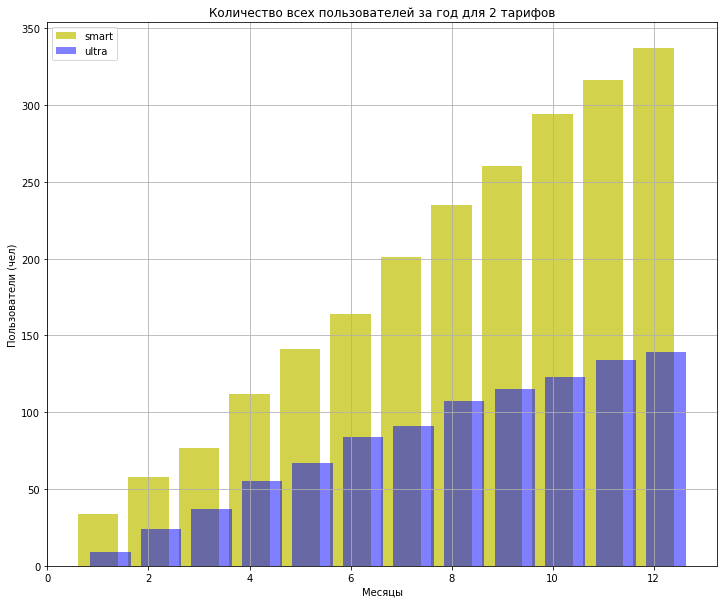

In [97]:
for index in ['user_id']:
    plt.figure(figsize=(12, 10))
    plt.bar(people_smart_total['month'], people_smart_total[index], label='smart', color='y', alpha=0.7)
    plt.bar(people_ultra_total['month']+0.25, people_ultra_total[index], label='ultra', color='b', alpha=0.5)
 
    plt.xlabel('Месяцы')
    plt.ylabel('Пользователи (чел)')
    plt.grid()
    plt.title(f'Количество всех пользователей за год для 2 тарифов')
    plt.legend()
    plt.show()

Видим, что распределение скошено влево (левосторонняя). Это связано с тем, что число пользователей росло ежемесячно, особенно на тарифе "Смарт" и к концу года превышало пользователей тарифа "Ультра" более, чем в 2 раза

Посмотрим гистограмму среднего: звонков, сообщений, трафика, дохода:

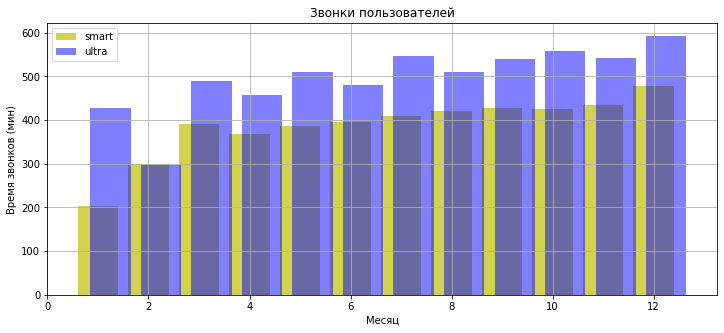

In [98]:
for index in ['time_calls']:
    plt.figure(figsize=(12, 5))
    plt.bar(df_smart_mean['month'], df_smart_mean[index], label='smart', color='y', alpha=0.7)
    plt.bar(df_ultra_mean['month']+0.25, df_ultra_mean[index], label='ultra', color='b', alpha=0.5)
 
    plt.xlabel('Месяц')
    plt.ylabel('Время звонков (мин)')
    plt.grid()
    plt.title(f'Звонки пользователей')
    plt.legend()
    plt.show()

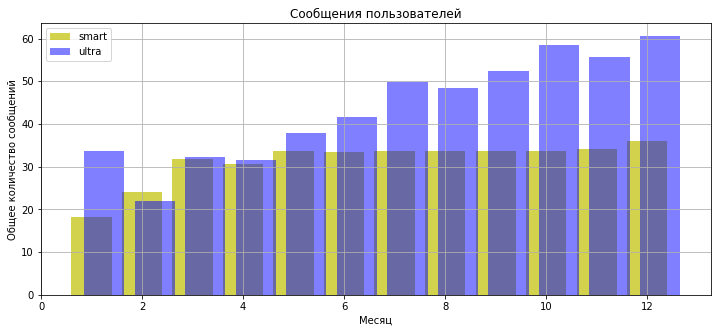

In [99]:
for index in ['total_message']:
    plt.figure(figsize=(12, 5))
    plt.bar(df_smart_mean['month'], df_smart_mean[index], label='smart', color='y', alpha=0.7)
    plt.bar(df_ultra_mean['month']+0.25, df_ultra_mean[index], label='ultra', color='b', alpha=0.5)
 
    plt.xlabel('Месяц')
    plt.ylabel('Общее количество сообщений')
    plt.grid()
    plt.title(f'Сообщения пользователей')
    plt.legend()
    plt.show()

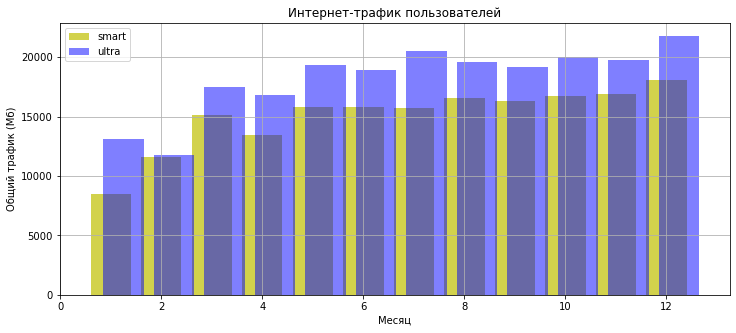

In [100]:
for index in ['total_traffic']:
    plt.figure(figsize=(12, 5))
    plt.bar(df_smart_mean['month'], df_smart_mean[index], label='smart', color='y', alpha=0.7)
    plt.bar(df_ultra_mean['month']+0.25, df_ultra_mean[index], label='ultra', color='b', alpha=0.5)
 
    plt.xlabel('Месяц')
    plt.ylabel('Общий трафик (Мб)')
    plt.grid()
    plt.title(f'Интернет-трафик пользователей')
    plt.legend()
    plt.show()

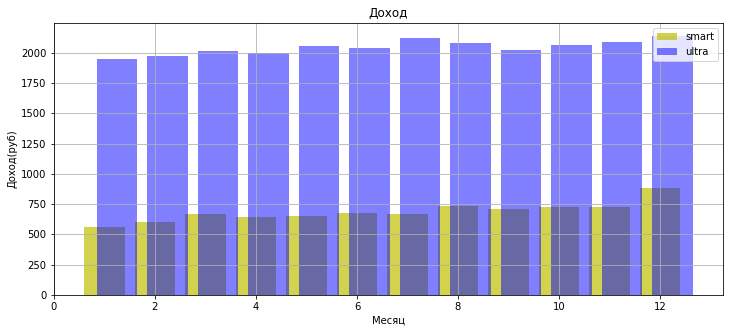

In [101]:
for index in ['income']:
    plt.figure(figsize=(12, 5))
    plt.bar(df_smart_mean['month'], df_smart_mean[index], label='smart', color='y', alpha=0.7)
    plt.bar(df_ultra_mean['month']+0.25, df_ultra_mean[index], label='ultra', color='b', alpha=0.5)
 
    plt.xlabel('Месяц')
    plt.ylabel('Доход(руб)')
    plt.grid()
    plt.title(f'Доход')
    plt.legend()
    plt.show()

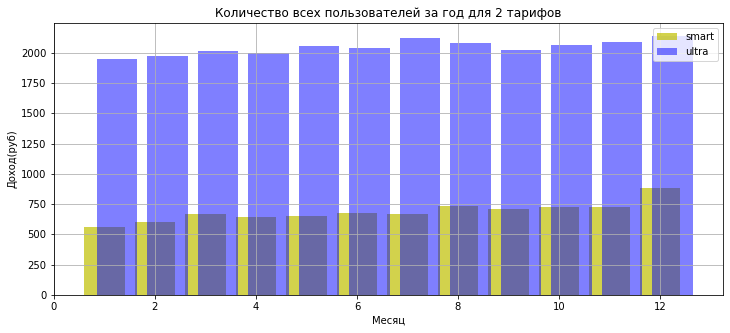

In [102]:
plt.figure(figsize=(12, 5))
plt.bar(df_smart_mean['month'], df_smart_mean['income'], label='smart', color='y', alpha=0.7)
plt.bar(df_ultra_mean['month']+0.25, df_ultra_mean['income'], label='ultra', color='b', alpha=0.5)
 
plt.xlabel('Месяц')
plt.ylabel('Доход(руб)')
plt.grid()
plt.title(f'Количество всех пользователей за год для 2 тарифов')
plt.legend()
plt.show()

Cравним два тарифа:

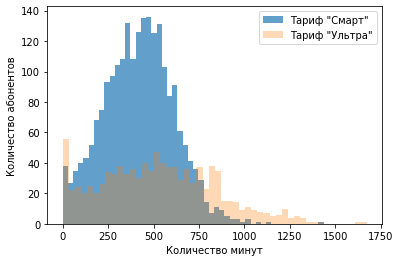

In [103]:
plt.hist(people_smart['time_calls'], bins=50, label='Тариф "Смарт"', alpha=0.7)
plt.hist(people_ultra['time_calls'], bins=50, label='Тариф "Ультра"', alpha=0.3)
plt.legend()
plt.xlabel('Количество минут')
plt.ylabel('Количество абонентов')
plt.show()

Видим, что количество абонентов больше на тарифе "Смарт", но время на разговор тратят больше абоненты "Ультра"

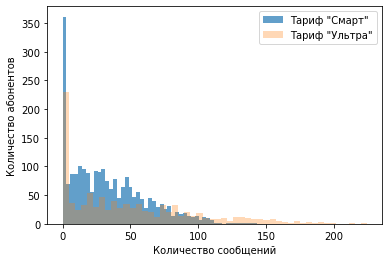

In [104]:
plt.hist(people_smart['total_message'], bins=50, label='Тариф "Смарт"', alpha=0.7)
plt.hist(people_ultra['total_message'], bins=50, label='Тариф "Ультра"', alpha=0.3)
plt.legend()
plt.xlabel('Количество сообщений')
plt.ylabel('Количество абонентов')
plt.show()

Видим, что есть абоненты на обоих тарифах, кто не пользуется сообщениями. Но чаще сообщения отправляют на тарифе "Смарт"

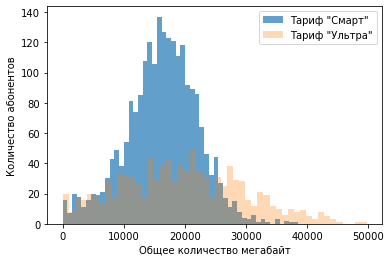

In [105]:
plt.hist(people_smart['total_traffic'], bins=50, label='Тариф "Смарт"', alpha=0.7)
plt.hist(people_ultra['total_traffic'], bins=50, label='Тариф "Ультра"', alpha=0.3)
plt.legend()
plt.xlabel('Общее количество мегабайт')
plt.ylabel('Количество абонентов')
plt.show()

Данные равномерно распределены, интернет-трафика абоненты тратят примерно одинаково

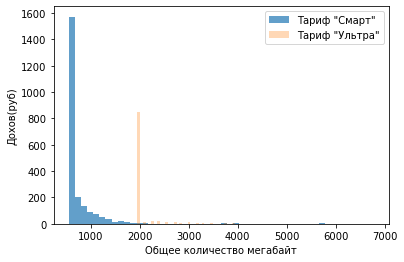

In [106]:
plt.hist(people_smart['income'], bins=50, label='Тариф "Смарт"', alpha=0.7)
plt.hist(people_ultra['income'], bins=50, label='Тариф "Ультра"', alpha=0.3)
plt.legend()
plt.xlabel('Общее количество мегабайт')
plt.ylabel('Дохов(руб)')
plt.show()

Абоненты тарифа "Ультра" платят в основном абонентскую плату, в то время как абоненты тарифа "Смарт" покупают допольнительные пакеты, что приносит допольнительный доход

# Проверка гипотез

##### Проверим гипотезу 1: 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Итак, сформулируем нулевую гипотезу Hо: "средняя выручка пользователей тарифов «Ультра» не равна выручке пользователей тарифов «Смарт»". 
Соответственно, альтернативная гипотеза Н1 звучит так: "средняя выручка пользователей тарифа «Смарт»  
равна средней выручке пользователей тарифа «Ультра»". Такая гипотеза называется двусторонней, т.к. возможно отклонение и в 
большую, и в меньшую стороны. Для проверки двусторонней гипотезы воспользуемся методом `scipy.stats.ttest_ind()`

In [107]:
alpha = .05
results = st.ttest_ind(df_smart_sum['income'], df_ultra_sum['income'])

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.3371886907089695

'Не получилось отвергнуть нулевую гипотезу'

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 3%. 
Следовательно, можно сделать вывод, что мы можем принять нулевую гипотезу

##### Проверим гипотезу 2: 
- отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.

In [108]:
df_moscow = df_groupby.query('city == "Москва"')['income']
df_other = df_groupby.query('city != "Москва"')['income']

Cформулируем нулевую гипотезу Hо: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Соответственно, альтернативная гипотеза Н1 звучит так: "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов". 

In [109]:
alpha = .05
results = st.ttest_ind(df_moscow, df_other)

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.017573366608432523

'Отвергаем нулевую гипотезу'

Можно сделать вывод, что мы можем принять альтернативную гипотезу


Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и одинаковые по размеру данные, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

# Вывод

* Судя по нашему исследованию, можно утверждать, что наиболее выгодный тариф в финансовом плане для сотового оператора - это тариф "Ультра": он за год принес оператору доход примерно 1,9 млн рублей ("Смарт" принес доход примерно 1,5 млн рублей).
* Но в то же время, следует отметить, что наиболее массовым тарифом является "Смарт" (к концу года пользователей "Смарта" превышало пользователей "Ультра" примерно в 2 раза). Следовательно, в дальнейшем, на длинной дистанции, с увеличением количества пользователей может увеличится и доход сотового оператора.

Рекомендовал бы сотовому оператору продвигать тариф "Смарт", так как увеличивается количество абонентов и в дальнейшем это приведет к увеличению прибыли